# outLier

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset = pd.read_excel("C:/Users/91750/Documents/DateSet/ESD.xlsx")


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   EEID            1000 non-null   object        
 1   Full Name       1000 non-null   object        
 2   Job Title       1000 non-null   object        
 3   Department      1000 non-null   object        
 4   Business Unit   1000 non-null   object        
 5   Gender          1000 non-null   object        
 6   Ethnicity       1000 non-null   object        
 7   Age             1000 non-null   int64         
 8   Hire Date       1000 non-null   datetime64[ns]
 9   Annual Salary   1000 non-null   int64         
 10  Bonus %         1000 non-null   float64       
 11  Country         1000 non-null   object        
 12  City            1000 non-null   object        
 13  Exit Date       85 non-null     datetime64[ns]
 14  Monthly Salary  1000 non-null   float64       
dtypes: da

In [4]:
dataset["Exit Date"].fillna(dataset['Exit Date'].mode()[0],inplace=True)

C:\Users\91750\AppData\Local\Temp\ipykernel_1756\3430059576.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Exit Date"].fillna(dataset['Exit Date'].mode()[0],inplace=True)


In [10]:
dataset.describe()

,Age,Hire Date,Annual Salary,Bonus %,Exit Date,Monthly Salary
count,1000.000000,1000,1.000000e+03,1000.000000,1000,1000.000000
mean,44.382000,2012-04-07 02:54:14.400000,1.217831e+05,0.088660,2020-03-24 01:24:57.600000,10148.595583
min,25.000000,1992-01-09 00:00:00,4.020000e+02,0.000000,1994-12-18 00:00:00,33.500000
25%,35.000000,2007-02-14 00:00:00,7.070375e+04,0.000000,2020-07-17 00:00:00,5891.979167
50%,45.000000,2014-02-15 12:00:00,9.632200e+04,0.000000,2020-07-17 00:00:00,8026.833333
75%,54.000000,2018-06-22 00:00:00,1.517230e+05,0.150000,2020-07-17 00:00:00,12643.583333
max,65.000000,2021-12-26 00:00:00,2.716195e+06,0.400000,2022-08-17 00:00:00,226349.583333
std,11.246981,NaN,1.280612e+05,0.117856,NaN,10671.767643


C:\Users\91750\AppData\Local\Temp\ipykernel_1608\4187756757.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Annual Salary"])


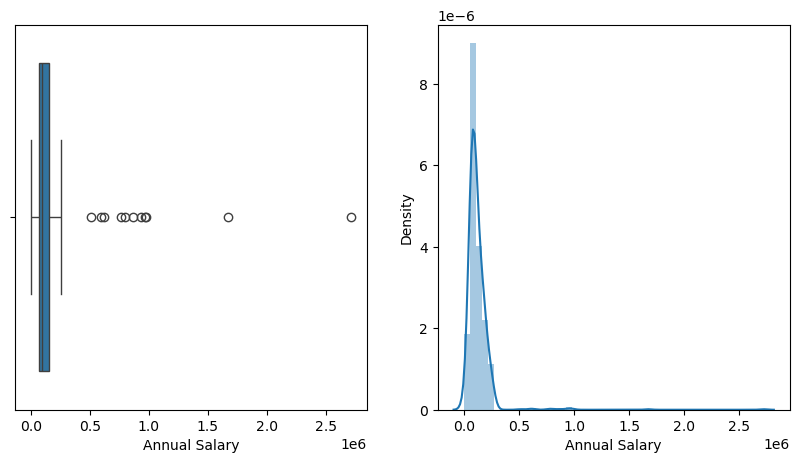

In [7]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x="Annual Salary",data=dataset)
plt.subplot(1,2,2)
sns.distplot(dataset["Annual Salary"])
plt.show()

In [5]:
q1 = dataset["Annual Salary"].quantile(0.25)
q1

70703.75

In [7]:
q3 = dataset["Annual Salary"].quantile(0.75)
q3

151723.0

In [9]:
IQR = q3-q1
IQR

81019.25

In [11]:
Min_range = q1 - (1.5 * IQR)
Max_range = q3 + (1.5 * IQR)

(Min_range,Max_range)

(-50825.125, 273251.875)

In [29]:
new_Data = dataset[dataset["Annual Salary"]<=Max_range]

In [27]:
new_Data.shape

(989, 15)

In [25]:
dataset.shape

(1000, 15)

In [174]:
new_Data.describe()

,Age,Hire Date,Annual Salary,Bonus %,Exit Date
count,989.000000,989,989.000000,989.000000,83
mean,44.362993,2012-04-01 18:49:52.113245696,113198.254803,0.088696,2016-10-27 10:24:34.698795264
min,25.000000,1992-01-09 00:00:00,40063.000000,0.000000,1994-12-18 00:00:00
25%,35.000000,2007-02-20 00:00:00,71359.000000,0.000000,2015-03-18 00:00:00
50%,45.000000,2014-02-11 00:00:00,96567.000000,0.000000,2019-05-23 00:00:00
75%,54.000000,2018-06-04 00:00:00,150758.000000,0.150000,2021-04-14 12:00:00
max,65.000000,2021-12-26 00:00:00,258498.000000,0.400000,2022-08-17 00:00:00
std,11.219682,NaN,53556.868509,0.117633,NaN


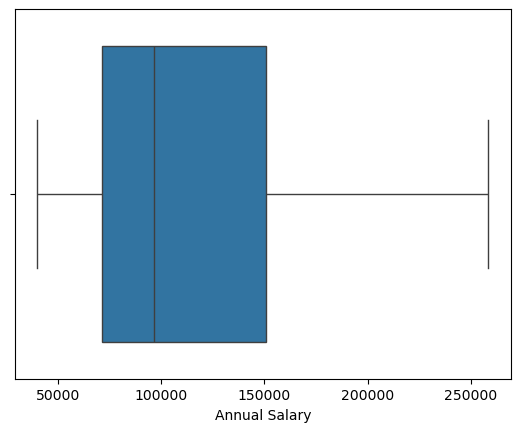

In [172]:
sns.boxplot(x="Annual Salary", data= new_Data)
plt.show()

# Remove Outliers using Z Score

In [195]:
dataset.describe

,Age,Hire Date,Annual Salary,Bonus %,Exit Date,Monthly Salary
count,1000.000000,1000,1.000000e+03,1000.000000,85,1000.000000
mean,44.382000,2012-04-07 02:54:14.400000,1.233801e+05,0.088660,2016-11-02 18:04:14.117647104,10281.675083
min,25.000000,1992-01-09 00:00:00,4.006300e+04,0.000000,1994-12-18 00:00:00,3338.583333
25%,35.000000,2007-02-14 00:00:00,7.151725e+04,0.000000,2014-12-25 00:00:00,5959.770833
50%,45.000000,2014-02-15 12:00:00,9.673800e+04,0.000000,2019-05-23 00:00:00,8061.500000
75%,54.000000,2018-06-22 00:00:00,1.518005e+05,0.150000,2021-04-09 00:00:00,12650.041667
max,65.000000,2021-12-26 00:00:00,2.716195e+06,0.400000,2022-08-17 00:00:00,226349.583333
std,11.246981,NaN,1.273308e+05,0.117856,NaN,10610.896993


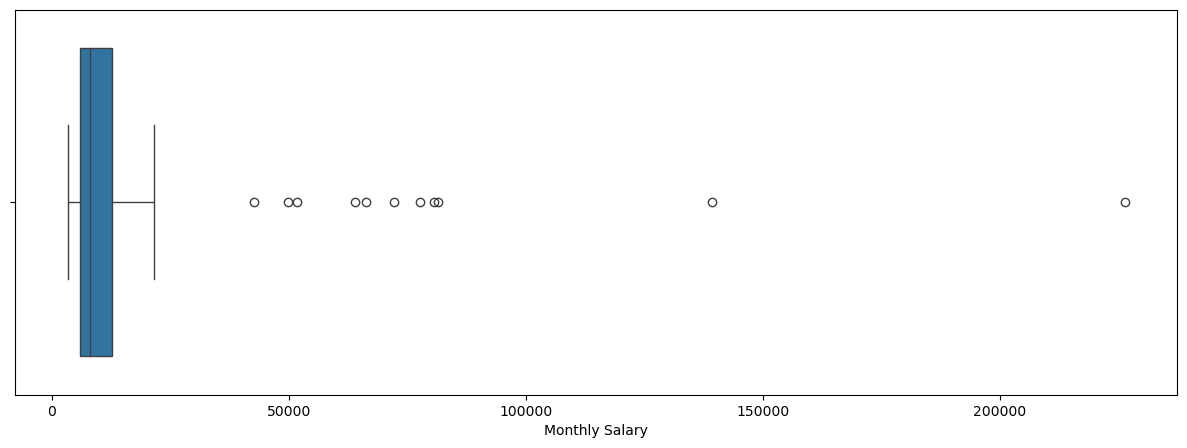

In [198]:
plt.figure(figsize=(15,5))
sns.boxplot(x = "Monthly Salary", data = dataset)
plt.show()

In [11]:
min_range = dataset["Monthly Salary"].mean() - (3*dataset["Monthly Salary"].std())
max_range = dataset["Monthly Salary"].mean() + (3*dataset["Monthly Salary"].std())
(min_range,max_range)

(-21866.707345419858, 42163.898512086525)

In [13]:
New_Dataset = dataset[dataset["Monthly Salary"]<=max_range]

In [231]:
New_Dataset .describe()

,Age,Hire Date,Annual Salary,Bonus %,Exit Date,Monthly Salary,Z_score
count,989.000000,989,989.000000,989.000000,83,989.000000,989.000000
mean,44.362993,2012-04-01 18:49:52.113245696,113198.254803,0.088696,2016-10-27 10:24:34.698795264,9433.187900,-0.079964
min,25.000000,1992-01-09 00:00:00,40063.000000,0.000000,1994-12-18 00:00:00,3338.583333,-0.654336
25%,35.000000,2007-02-20 00:00:00,71359.000000,0.000000,2015-03-18 00:00:00,5946.583333,-0.408551
50%,45.000000,2014-02-11 00:00:00,96567.000000,0.000000,2019-05-23 00:00:00,8047.250000,-0.210578
75%,54.000000,2018-06-04 00:00:00,150758.000000,0.150000,2021-04-14 12:00:00,12563.166667,0.215014
max,65.000000,2021-12-26 00:00:00,258498.000000,0.400000,2022-08-17 00:00:00,21541.500000,1.061157
std,11.219682,NaN,53556.868509,0.117633,NaN,4463.072376,0.420612


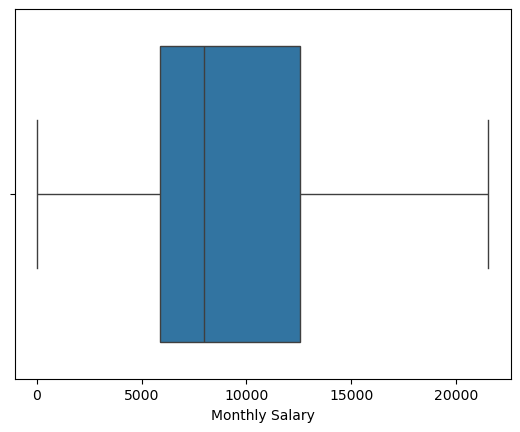

In [15]:
sns.boxplot(x = "Monthly Salary",data= New_Dataset)
plt.show()

In [233]:
Z_score = (dataset["Monthly Salary"] - dataset["Monthly Salary"].mean())/dataset["Monthly Salary"].std()

In [235]:
dataset["Z_score"] = Z_score

In [257]:
dataset[dataset['Z_score']<3]

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date,Monthly Salary,Z_score
0,E02387,Emily Davis,Sr. Manger,IT,Research & Development,Female,Black,55,2016-04-08,141604,0.15,United States,Seattle,2021-10-16,11800.333333,0.143123
1,E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59,1997-11-29,99975,0.00,China,Chongqing,NaT,8331.250000,-0.183813
2,E02572,Luna Sanders,Director,Finance,Speciality Products,Female,Caucasian,50,2006-10-26,163099,0.20,United States,Chicago,NaT,13591.583333,0.311935
3,E02832,Penelope Jordan,Computer Systems Manager,IT,Manufacturing,Female,Caucasian,26,2019-09-27,84913,0.07,United States,Chicago,NaT,7076.083333,-0.302104
4,E01639,Austin Vo,Sr. Analyst,Finance,Manufacturing,Male,Asian,55,1995-11-20,95409,0.00,United States,Phoenix,NaT,7950.750000,-0.219673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,E01148,Scarlett Kumar,Systems Analyst,IT,Corporate,Female,Asian,55,2009-01-07,47032,0.00,United States,Columbus,NaT,3919.333333,-0.599605
995,E03094,Wesley Young,Sr. Analyst,Marketing,Speciality Products,Male,Caucasian,33,2016-09-18,98427,0.00,United States,Columbus,NaT,8202.250000,-0.195971
996,E01909,Lillian Khan,Analyst,Finance,Speciality Products,Female,Asian,44,2010-05-31,47387,0.00,China,Chengdu,2018-01-08,3948.916667,-0.596817
997,E04398,Oliver Yang,Director,Marketing,Speciality Products,Male,Asian,31,2019-06-10,176710,0.15,United States,Miami,NaT,14725.833333,0.418830


# Handle Duplicates

In [2]:
import pandas as pd
df = pd.DataFrame({"Name":["puneet","sonam","puneet","mohan","sonam"],"Age":[24,27,24,24,27],"Gender":["m","f","m","m","f"],"Corse":["bba","bca","mba","msc","bca"]})
df

,Name,Age,Gender,Corse
0,puneet,24,m,bba
1,sonam,27,f,bca
2,puneet,24,m,mba
3,mohan,24,m,msc
4,sonam,27,f,bca


In [3]:
df[df['Age'].duplicated()]
# df['Age'].duplicated()

,Name,Age,Gender,Corse
2,puneet,24,m,mba
3,mohan,24,m,msc
4,sonam,27,f,bca


In [76]:
df.drop_duplicates(inplace=True)
df

In [94]:
dataset.shape

(1000, 14)

In [96]:
dataset.drop_duplicates(inplace=True)

In [98]:
dataset.shape

(1000, 14)

# Feature Scaling

STANDARDIZATION ---  Xnew = (Xi-Xmean)/std

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   EEID            1000 non-null   object        
 1   Full Name       1000 non-null   object        
 2   Job Title       1000 non-null   object        
 3   Department      1000 non-null   object        
 4   Business Unit   1000 non-null   object        
 5   Gender          1000 non-null   object        
 6   Ethnicity       1000 non-null   object        
 7   Age             1000 non-null   int64         
 8   Hire Date       1000 non-null   datetime64[ns]
 9   Annual Salary   1000 non-null   int64         
 10  Bonus %         1000 non-null   float64       
 11  Country         1000 non-null   object        
 12  City            1000 non-null   object        
 13  Exit Date       1000 non-null   datetime64[ns]
 14  Monthly Salary  1000 non-null   float64       
dtypes: da

C:\Users\91750\AppData\Local\Temp\ipykernel_1740\932134866.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Annual Salary"])


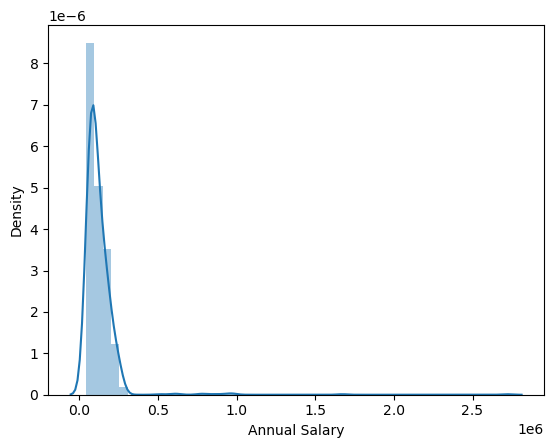

In [249]:
sns.distplot(dataset["Annual Salary"])
plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler

In [16]:
ss= StandardScaler()
ss.fit(dataset[["Annual Salary"]])

StandardScaler()

In [22]:
dataset["Annual Salary_ss"] = pd.DataFrame(ss.transform(dataset[["Annual Salary"]]),columns=["x"])

In [42]:
dataset.describe()

,Age,Hire Date,Annual Salary,Bonus %,Exit Date,Monthly Salary,Annual Salary_ss,Fs_Annual_S
count,1000.000000,1000,1.000000e+03,1000.000000,1000,1000.000000,1.000000e+03,1.000000e+03
mean,44.382000,2012-04-07 02:54:14.400000,1.217831e+05,0.088660,2020-03-24 01:24:57.600000,10148.595583,2.131628e-17,2.486900e-17
min,25.000000,1992-01-09 00:00:00,4.020000e+02,0.000000,1994-12-18 00:00:00,33.500000,-9.483112e-01,-9.478369e-01
25%,35.000000,2007-02-14 00:00:00,7.070375e+04,0.000000,2020-07-17 00:00:00,5891.979167,-3.990666e-01,-3.988670e-01
50%,45.000000,2014-02-15 12:00:00,9.632200e+04,0.000000,2020-07-17 00:00:00,8026.833333,-1.989196e-01,-1.988201e-01
75%,54.000000,2018-06-22 00:00:00,1.517230e+05,0.150000,2020-07-17 00:00:00,12643.583333,2.339103e-01,2.337933e-01
max,65.000000,2021-12-26 00:00:00,2.716195e+06,0.400000,2022-08-17 00:00:00,226349.583333,2.026929e+01,2.025915e+01
std,11.246981,NaN,1.280612e+05,0.117856,NaN,10671.767643,1.000500e+00,1.000000e+00


C:\Users\91750\AppData\Local\Temp\ipykernel_824\1505117777.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Annual Salary"])
C:\Users\91750\AppData\Local\Temp\ipykernel_824\1505117777.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Annual Salary_ss"])


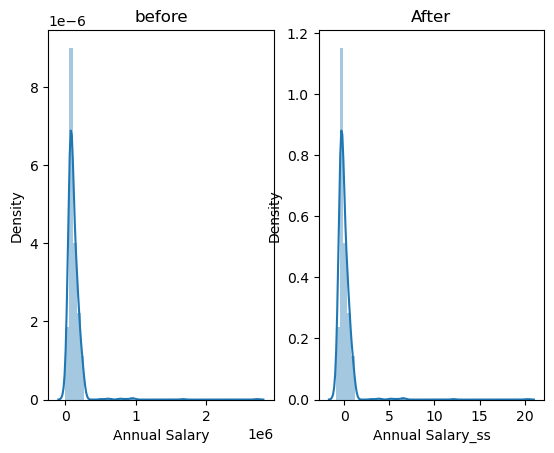

In [52]:
plt.subplot(1,2,1)
plt.title("before")
sns.distplot(dataset["Annual Salary"])
plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset["Annual Salary_ss"])
plt.show()

# NORMALIZATION (Min-Max Scaling) -- Xnew = ( Xi-min(X) )/( max(x)-min(x) )

In [57]:
dataset.describe()

,Age,Hire Date,Annual Salary,Bonus %,Exit Date,Monthly Salary,Annual Salary_ss,Fs_Annual_S
count,1000.000000,1000,1.000000e+03,1000.000000,1000,1000.000000,1.000000e+03,1.000000e+03
mean,44.382000,2012-04-07 02:54:14.400000,1.217831e+05,0.088660,2020-03-24 01:24:57.600000,10148.595583,2.131628e-17,2.486900e-17
min,25.000000,1992-01-09 00:00:00,4.020000e+02,0.000000,1994-12-18 00:00:00,33.500000,-9.483112e-01,-9.478369e-01
25%,35.000000,2007-02-14 00:00:00,7.070375e+04,0.000000,2020-07-17 00:00:00,5891.979167,-3.990666e-01,-3.988670e-01
50%,45.000000,2014-02-15 12:00:00,9.632200e+04,0.000000,2020-07-17 00:00:00,8026.833333,-1.989196e-01,-1.988201e-01
75%,54.000000,2018-06-22 00:00:00,1.517230e+05,0.150000,2020-07-17 00:00:00,12643.583333,2.339103e-01,2.337933e-01
max,65.000000,2021-12-26 00:00:00,2.716195e+06,0.400000,2022-08-17 00:00:00,226349.583333,2.026929e+01,2.025915e+01
std,11.246981,NaN,1.280612e+05,0.117856,NaN,10671.767643,1.000500e+00,1.000000e+00


C:\Users\91750\AppData\Local\Temp\ipykernel_824\2230528487.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Monthly Salary'])


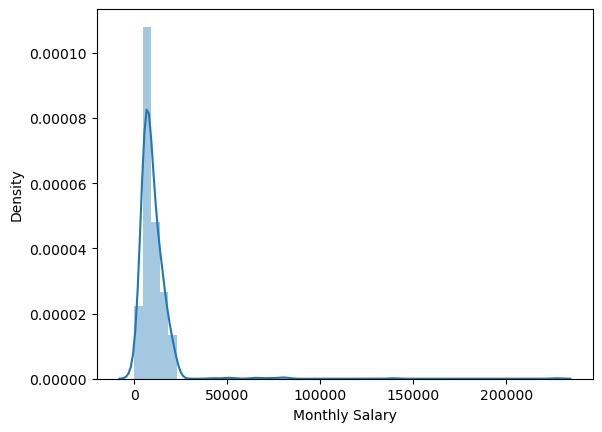

In [63]:
sns.distplot(dataset['Monthly Salary'])
plt.show()

In [65]:
from  sklearn.preprocessing import MinMaxScaler

In [69]:
ms = MinMaxScaler()
dataset["Monthly Salary_ms"]=ms.fit_transform(dataset[["Monthly Salary"]])

In [71]:
dataset.head(5)

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date,Monthly Salary,Annual Salary_ss,Fs_Annual_S,Monthly Salary_ms
0,E02387,Emily Davis,Sr. Manger,IT,Research & Development,Female,Black,55,2016-04-08,141604,0.15,United States,Seattle,2021-10-16,11800.333333,0.154854,0.154776,0.051993
1,E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59,1997-11-29,99975,0.00,China,Chongqing,2020-07-17,8331.250000,-0.170380,-0.170295,0.036664
2,E02572,Luna Sanders,Director,Finance,Speciality Products,Female,Caucasian,50,2006-10-26,163099,0.20,United States,Chicago,2020-07-17,13591.583333,0.322787,0.322626,0.059908
3,E02832,Penelope Jordan,Computer Systems Manager,IT,Manufacturing,Female,Caucasian,26,2019-09-27,84913,0.07,United States,Chicago,2020-07-17,7076.083333,-0.288054,-0.287910,0.031118
4,E01639,Austin Vo,Sr. Analyst,Finance,Manufacturing,Male,Asian,55,1995-11-20,95409,0.00,United States,Phoenix,2020-07-17,7950.750000,-0.206053,-0.205950,0.034983


C:\Users\91750\AppData\Local\Temp\ipykernel_824\1257084517.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Monthly Salary"])
C:\Users\91750\AppData\Local\Temp\ipykernel_824\1257084517.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Monthly Salary_ms"])


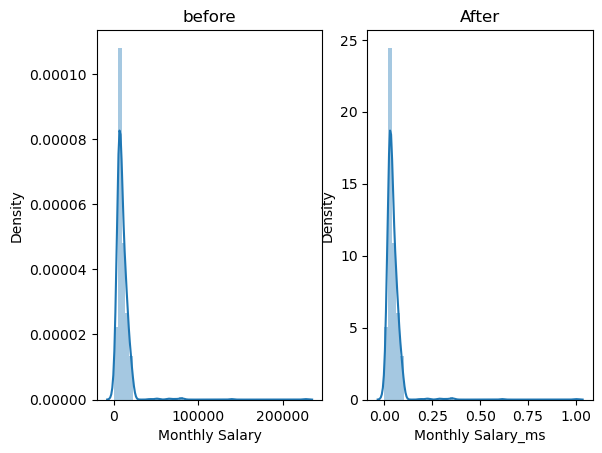

In [73]:
plt.subplot(1,2,1)
plt.title("before")
sns.distplot(dataset["Monthly Salary"])
plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset["Monthly Salary_ms"])
plt.show()

# Replace and change Datatype

In [79]:
data = pd.read_csv("C:/Users/91750/Documents/DateSet/company1.csv")
data

,EEID,Name,gender,salary,marks,corse,grades,married,place
0,EMP01,ayushi,F,44000,23,bba,1,no,urban
1,EMP02,rohit,M,25000,35,bca,3+,yes,rular
2,EMP03,pranjali,F,27000,45,b tech,0,yes,semi urban
3,EMP04,pushpa,M,25000,21,bsc,0,yes,urban
4,EMP05,rohit,M,23000,45,mca,2,no,rular
5,EMP06,ayushi,F,16200,43,bba,3+,no,urban
6,EMP07,rohit,M,12000,46,bca,0,yes,rular
7,EMP08,pranjali,F,78010,49,b tech,3+,yes,semi urban
8,EMP09,pushpa,M,34000,52,bsc,1,yes,urban
9,EMP10,ayushi,M,16000,55,mca,3+,no,rular


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   EEID     10 non-null     object
 1   Name     10 non-null     object
 2   gender   10 non-null     object
 3   salary   10 non-null     int64 
 4   marks    10 non-null     int64 
 5   corse    10 non-null     object
 6   grades   10 non-null     object
 7   married  10 non-null     object
 8   place    10 non-null     object
dtypes: int64(2), object(7)
memory usage: 852.0+ bytes


In [88]:
data["grades"].value_counts()

grades
3+    4
0     3
1     2
2     1
Name: count, dtype: int64

In [90]:
data['grades'].replace("3+","3",inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   EEID     10 non-null     object
 1   Name     10 non-null     object
 2   gender   10 non-null     object
 3   salary   10 non-null     int64 
 4   marks    10 non-null     int64 
 5   corse    10 non-null     object
 6   grades   10 non-null     object
 7   married  10 non-null     object
 8   place    10 non-null     object
dtypes: int64(2), object(7)
memory usage: 852.0+ bytes


In [94]:
data["grades"]=data["grades"].astype("int64")
data

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   EEID     10 non-null     object
 1   Name     10 non-null     object
 2   gender   10 non-null     object
 3   salary   10 non-null     int64 
 4   marks    10 non-null     int64 
 5   corse    10 non-null     object
 6   grades   10 non-null     int64 
 7   married  10 non-null     object
 8   place    10 non-null     object
dtypes: int64(3), object(6)
memory usage: 852.0+ bytes


# Function Transform

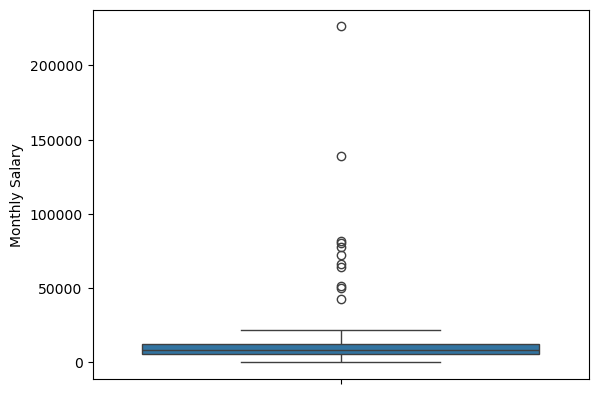

In [17]:
sns.boxplot(dataset['Monthly Salary'])
plt.show()

In [19]:
MIN_RANGE = dataset["Monthly Salary"].mean() - (3 * dataset["Monthly Salary"].std())
MAX_RANGE = dataset["Monthly Salary"].mean() + (3 * dataset["Monthly Salary"].std())
(MIN_RANGE,MAX_RANGE)

(-21866.707345419858, 42163.898512086525)

In [21]:
q1 = dataset["Monthly Salary"].quantile(0.25)
q3 = dataset["Monthly Salary"].quantile(0.75)
IQR = q3 - q1
MIN_RANGE = q1 - (1.5 * IQR)
MAX_RANGE = q3 + (1.5 * IQR)
(MIN_RANGE,MAX_RANGE)

(-4235.427083333331, 22770.98958333333)

In [23]:
dataset = dataset[dataset["Monthly Salary"]<=MAX_RANGE]

In [127]:
dataset

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date,Monthly Salary,Annual Salary_ss,Fs_Annual_S,Monthly Salary_ms
0,E02387,Emily Davis,Sr. Manger,IT,Research & Development,Female,Black,55,2016-04-08,141604,0.15,United States,Seattle,2021-10-16,11800.333333,0.154854,0.154776,0.051993
1,E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59,1997-11-29,99975,0.00,China,Chongqing,2020-07-17,8331.250000,-0.170380,-0.170295,0.036664
2,E02572,Luna Sanders,Director,Finance,Speciality Products,Female,Caucasian,50,2006-10-26,163099,0.20,United States,Chicago,2020-07-17,13591.583333,0.322787,0.322626,0.059908
3,E02832,Penelope Jordan,Computer Systems Manager,IT,Manufacturing,Female,Caucasian,26,2019-09-27,84913,0.07,United States,Chicago,2020-07-17,7076.083333,-0.288054,-0.287910,0.031118
4,E01639,Austin Vo,Sr. Analyst,Finance,Manufacturing,Male,Asian,55,1995-11-20,95409,0.00,United States,Phoenix,2020-07-17,7950.750000,-0.206053,-0.205950,0.034983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,E01148,Scarlett Kumar,Systems Analyst,IT,Corporate,Female,Asian,55,2009-01-07,47032,0.00,United States,Columbus,2020-07-17,3919.333333,-0.584006,-0.583714,0.017170
995,E03094,Wesley Young,Sr. Analyst,Marketing,Speciality Products,Male,Caucasian,33,2016-09-18,98427,0.00,United States,Columbus,2020-07-17,8202.250000,-0.182474,-0.182383,0.036094
996,E01909,Lillian Khan,Analyst,Finance,Speciality Products,Female,Asian,44,2010-05-31,47387,0.00,China,Chengdu,2018-01-08,3948.916667,-0.581233,-0.580942,0.017301
997,E04398,Oliver Yang,Director,Marketing,Speciality Products,Male,Asian,31,2019-06-10,176710,0.15,United States,Miami,2020-07-17,14725.833333,0.429126,0.428911,0.064920


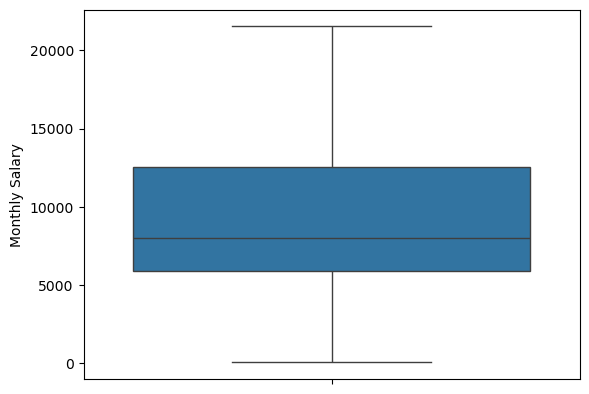

In [25]:
sns.boxplot(dataset['Monthly Salary'])
plt.show()

In [27]:
from sklearn.preprocessing import FunctionTransformer

In [85]:
ft = FunctionTransformer(func=lambda x:x ** 2) # func = np.log1p

In [87]:
dataset["Monthly Salary"] = dataset["Monthly Salary"].astype("int64")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 989 entries, 0 to 998
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   EEID               989 non-null    object        
 1   Full Name          989 non-null    object        
 2   Job Title          989 non-null    object        
 3   Department         989 non-null    object        
 4   Business Unit      989 non-null    object        
 5   Gender             989 non-null    object        
 6   Ethnicity          989 non-null    object        
 7   Age                989 non-null    int64         
 8   Hire Date          989 non-null    datetime64[ns]
 9   Annual Salary      989 non-null    int64         
 10  Bonus %            989 non-null    float64       
 11  Country            989 non-null    object        
 12  City               989 non-null    object        
 13  Exit Date          83 non-null     datetime64[ns]
 14  Monthly Salary 

In [89]:
ft.fit(dataset[['Annual Salary']])

FunctionTransformer(func=<function <lambda> at 0x0000024DF47A1B20>)

In [91]:
dataset["Annual Salary_ft"]=ft.transform(dataset[['Annual Salary']])

C:\Users\91750\AppData\Local\Temp\ipykernel_1608\3470587229.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Annual Salary"])
C:\Users\91750\AppData\Local\Temp\ipykernel_1608\3470587229.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Annual Salary_ft"])


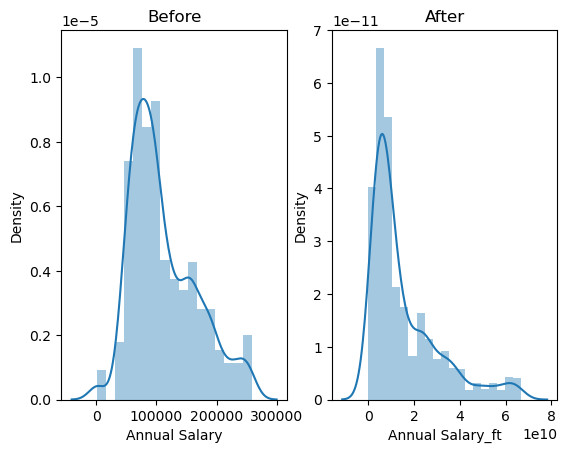

In [93]:
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset["Annual Salary"])
plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset["Annual Salary_ft"])
plt.show()

# FEATURES SELECTION TECHNIQUES 

In [21]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

ModuleNotFoundError: No module named 'mlxtend'

In [15]:
from sklearn.linear_model import LogisticRegression

In [7]:
dataS = pd.read_csv("c:/Users/91750/Downloads/diabetes.csv")
dataS.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
x = dataS.iloc[:,:-1]
y = dataS["Outcome"]

In [16]:
lr = LogisticRegression()

In [19]:
fs = SequentialFeatureSelector(lr,k_features=8,forward = True)
fs.fit(x,y)

NameError: name 'SequentialFeatureSelector' is not defined

In [ ]:
fs.feature_names

In [ ]:
fs.k_feature_names_

In [ ]:
fs.k_score_*100

# TRAIN TEST SPLIT 

In [26]:
from sklearn.model_selection import train_test_split

In [28]:
input_data =  dataS.iloc[:,:-1]
Output_data = dataS["Outcome"]

In [30]:
x_train,x_test,y_train,y_test = train_test_split(input_data,Output_data,test_size=0.25)

In [32]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
338,9,152,78,34,171,34.2,0.893,33
542,10,90,85,32,0,34.9,0.825,56
46,1,146,56,0,0,29.7,0.564,29
681,0,162,76,36,0,49.6,0.364,26
519,6,129,90,7,326,19.6,0.582,60
...,...,...,...,...,...,...,...,...
85,2,110,74,29,125,32.4,0.698,27
341,1,95,74,21,73,25.9,0.673,36
130,4,173,70,14,168,29.7,0.361,33
310,6,80,66,30,0,26.2,0.313,41


In [38]:
y_test

568    0
82     0
754    1
617    0
221    1
      ..
727    0
387    1
493    1
322    1
625    0
Name: Outcome, Length: 192, dtype: int64